In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
d = pd.read_csv("data/company-stock-movements-2010-2015-incl.csv.gz", index_col=0)
d.shape

(60, 963)

In [3]:
d.head()

,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,2010-01-15,...,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
Apple,0.580000,-0.220005,-3.409998,-1.170000,1.680011,-2.689994,-1.469994,2.779997,-0.680003,-4.999995,...,0.320008,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981
AIG,-0.640002,-0.650000,-0.210001,-0.420000,0.710001,-0.200001,-1.130001,0.069999,-0.119999,-0.500000,...,0.919998,0.709999,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002,0.660000
Amazon,-2.350006,1.260009,-2.350006,-2.009995,2.960006,-2.309997,-1.640007,1.209999,-1.790001,-2.039994,...,2.109985,3.699982,9.570008,-3.450013,4.820008,-4.079986,2.579986,4.790009,-1.760009,3.740021
American express,0.109997,0.000000,0.260002,0.720002,0.190003,-0.270001,0.750000,0.300004,0.639999,-0.130001,...,0.680001,2.290001,0.409996,-0.069999,0.100006,0.069999,0.130005,1.849999,0.040001,0.540001
Boeing,0.459999,1.770000,1.549999,2.690003,0.059997,-1.080002,0.360000,0.549999,0.530002,-0.709999,...,1.559997,2.480003,0.019997,-1.220001,0.480003,3.020004,-0.029999,1.940002,1.130005,0.309998


## Exercise 1: convert `d` into a signed matrix

turn all values to 1 if >0 and -1 otherwise

In [4]:
d = np.sign(d)
d.head()

,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,2010-01-15,...,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
Apple,1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,...,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,-1.0,1.0,-1.0
AIG,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,...,1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0
Amazon,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,...,1.0,1.0,1.0,-1.0,1.0,-1.0,1.0,1.0,-1.0,1.0
American express,1.0,0.0,1.0,1.0,1.0,-1.0,1.0,1.0,1.0,-1.0,...,1.0,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0
Boeing,1.0,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,1.0,-1.0,...,1.0,1.0,1.0,-1.0,1.0,1.0,-1.0,1.0,1.0,1.0


## Exercise 2: implement custom metric

the intuition is that we want our metric to reward sets of symbols moving in sync.

So, given a matrix:
    
1. for each column compute the max number of positions with equal value.
1.  divide by the number of elements in the column
1. average the value for all columns

for instance, for the following matrix

In [5]:
m  = np.array([[-1,  1,  1, -1],
               [-1, -1,  1, -1],
               [-1, -1,  1,  1],
               [-1, -1, -1,  1],
               [-1,  1,  1, -1],
               [-1, -1,  1, -1]])

1. the number of positions of equal value for each column is `6,4,5,4`
2. normalizing by the number of elements per column (6) is `1,0.6667,.8333,.6667`
3. the mean of the previous result is `0.7911`

**complete the following function** to compute this metric, assuming the input matrix `m` is a numpy array containing only values of -1 and 1

In [6]:
def mean_sync_move(m):
    return np.mean([np.max([np.sum(m[:,i]==1), np.sum(m[:,i]==-1)])*1./len(m) for i in range(m.shape[1])])

In [7]:
mean_sync_move(m)

0.7916666666666666

In [8]:
mean_sync_move(np.ones((10,2)))

1.0

obtain the `mean_sync_move` of the full dataset. It should be around `0.72`

In [9]:
print mean_sync_move(d.values)

0.7220664589823468


## Exercise 3: Cluster the full dataset 

- try experiments with KMeans and 4 to 10 clusters
- for each experiments obtain
   - the cluster number
   - the number of companies in the cluster
   - the `mean_sync_move` of each cluster
   
- select from your experiments one cluster with significantly large `mean_sync_move`
- show the companies in that cluster

In [10]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

In [11]:
n_clusters=8
c = KMeans(n_clusters=n_clusters)
y = c.fit_predict(d.values)
pd.DataFrame(np.r_[[[i, np.sum(y==i), mean_sync_move(d.values[y==i])] for i in np.unique(y)]],
            columns=["cluster", "nb companies", "mean_sync_move"])

,cluster,nb companies,mean_sync_move
0,0.0,1.0,0.970924
1,1.0,5.0,0.793146
2,2.0,13.0,0.757489
3,3.0,22.0,0.739592
4,4.0,5.0,0.832814
5,5.0,4.0,0.777518
6,6.0,3.0,0.829699
7,7.0,7.0,0.820056


In [12]:
d.iloc[y==3]

,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,2010-01-15,...,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
Apple,1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,...,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,-1.0,1.0,-1.0
Amazon,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,...,1.0,1.0,1.0,-1.0,1.0,-1.0,1.0,1.0,-1.0,1.0
American express,1.0,0.0,1.0,1.0,1.0,-1.0,1.0,1.0,1.0,-1.0,...,1.0,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0
Canon,1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0,1.0,1.0,-1.0,...,1.0,1.0,1.0,1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0
Cisco,1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0,...,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0,1.0,1.0
Ford,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,1.0,-1.0,...,1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0
Google/Alphabet,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0,...,1.0,-1.0,1.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0
Honda,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,-1.0,...,1.0,1.0,1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0
HP,1.0,1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0,...,1.0,1.0,-1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0
IBM,1.0,-1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,...,1.0,1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,1.0,1.0


## Exercise 4: After understanding PCA

apply PCA with 2 components to +1/-1 dataset and visualize clusters

In [13]:
from sklearn.decomposition import PCA

In [14]:
n_clusters = 7

In [15]:
X = PCA(n_components=2).fit_transform(d.values)

In [16]:
y = KMeans(n_clusters=10).fit_predict(d.values)

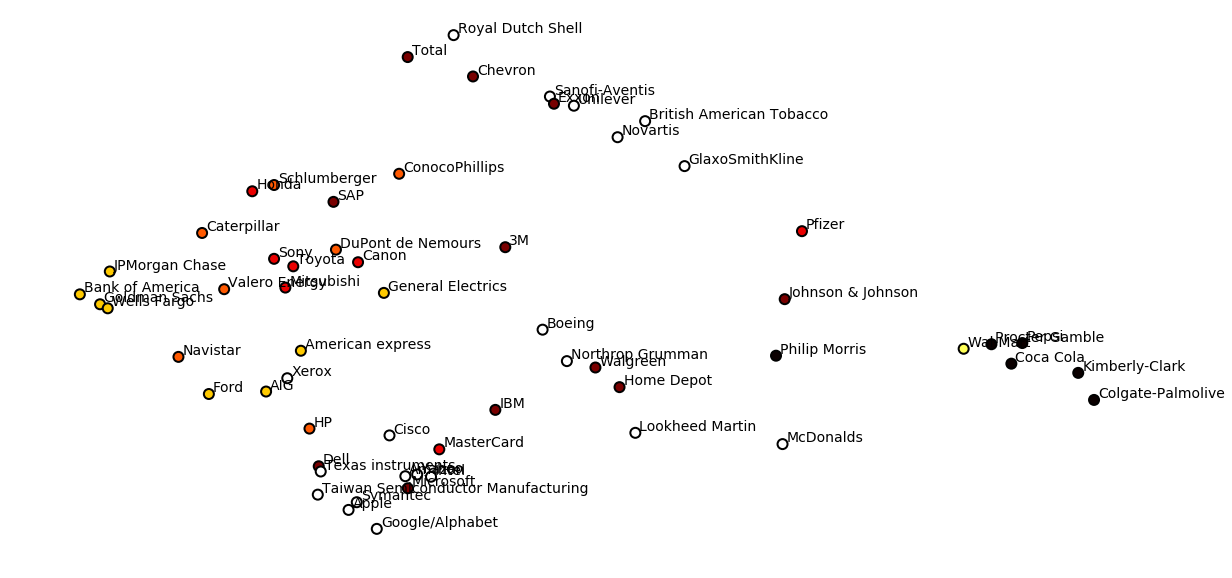

In [17]:
cmap = plt.cm.hot
plt.figure(figsize=(20,10))
plt.scatter(X[:,0], X[:,1], color=cmap((y*255./(n_clusters-1)).astype(int)), s=100, edgecolor="black", lw=2)
for i in range(len(d)):
    name = d.index[i]
    plt.text(X[i,0]+.1, X[i,1]+.1,d.index[i], fontsize=14)
plt.axis("off");